In [5]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import pandas as pd
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter as gauss

from pyspec import spectrum as spec
from matplotlib.colors import LogNorm

In [2]:

path='/data/pacific/lrenault/SASI/FULL/WRF/'
listm=glob(path+'*DAY.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[-9:])


path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listt=glob(path+'*DAY.nc');listt.sort()
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt)

In [3]:
plt.rcParams['font.size']=15
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['font.weight']='bold'

In [4]:
varf

<xarray.Dataset>
Dimensions:               (y: 390, x: 300, lev_M: 49, lev_W: 50, time_counter: 274, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(390, 300), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(390, 300), meta=np.ndarray>
  * lev_M                 (lev_M) float32 1.0 2.0 3.0 4.0 ... 47.0 48.0 49.0
  * lev_W                 (lev_W) float32 1.0 2.0 3.0 4.0 ... 48.0 49.0 50.0
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2011-11-01T12:00:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/28)
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    T2                    (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    Q2                    (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    RAINCV                (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    RAINNCV               (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    ...                    ...
    XKHH                  (time_counter, lev_M, y, x) float32 dask.array<chunksize=(30, 49, 390, 300), meta=np.ndarray>
    BN2                   (time_counter, lev_M, y, x) float32 dask.array<chunksize=(30, 49, 390, 300), meta=np.ndarray>
    AKMS                  (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    AKHS                  (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    EXCH_H                (time_counter, lev_W, y, x) float32 dask.array<chunksize=(30, 50, 390, 300), meta=np.ndarray>
    EXCH_M                (time_counter, lev_W, y, x) float32 dask.array<chunksize=(30, 50, 390, 300), meta=np.ndarray>
Attributes: (12/100)
    name:                            Out/wrf_3D_Y2011M11_DAY
    description:                     wrf M grid variables
    title:                           wrf M grid variables
    Conventions:                     CF-1.6
    timeStamp:                       2020-Jul-28 14:17:36 GMT
    uuid:                            b6883739-62d0-4439-ae6e-92fc67aed774
    ...                              ...
    ISLAKE:                          -1
    ISICE:                           24
    ISURBAN:                         1
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [6]:
uf=varf.UOCE[:,30:-30,30:200] 
vf=varf.VOCE[:,30:-30,30:200]
uwf=varf.U10[:,30:-30,30:200] 
vwf=varf.V10[:,30:-30,30:200] 
wf=varf.WSPD10[:,30:-30,30:200] 


ut=vart.UOCE[:,30:-30,30:200]
vt=vart.VOCE[:,30:-30,30:200]
uwt=vart.U10[:,30:-30,30:200] 
vwt=vart.V10[:,30:-30,30:200] 
wt=vart.WSPD10[:,30:-30,30:200] 


In [8]:

dxx=0.013*111e3
dyy=0.013*111e3

In [9]:
#stress
# tx_f= 1.25*10e-3*(wf)*(uwf)
# ty_f= 1.25*10e-3*(wf)*(vwf)

# tx_t=1.25*10e-3*(wt)*(uwt)
# ty_t=1.25*10e-3*(wt)*(vwt)

tx_f= 1.25*10e-3*(wf-np.sqrt(uf**2 + vf**2))*(uwf - uf)
ty_f= 1.25*10e-3*(wf-np.sqrt(ut**2 + vf**2))*(vwf - vf)

tx_t=1.25*10e-3*(wt-np.sqrt(ut**2 + vt**2))*(uwt - ut)
ty_t=1.25*10e-3*(wt-np.sqrt(ut**2 + vt**2))*(vwt - vt)

In [10]:
#wind work analysis

FKf=(1/(1024))*(tx_f*uf + ty_f*vf)
FKt=(1/(1024))*(tx_t*ut + ty_t*vt)



In [22]:
np.nanmean(FKf,axis=2).mean(1).min()

-7.077911e-06

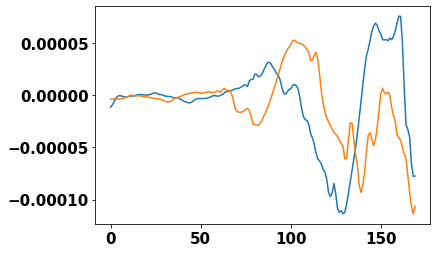

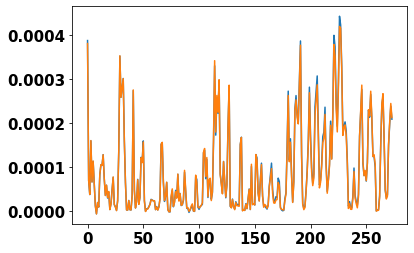

In [46]:
plt.figure()

plt.plot(FKf[100,100,:])
plt.plot(FKt[100,100,:])

plt.figure()
plt.plot(np.nanmean(FKf,axis=2).mean(1))
plt.plot(np.nanmean(FKt,axis=2).mean(1))
# plt.ylim(0,10e-5)

In [24]:
exspec=spec.TWODimensional_spec(uf[0,:,:],dxx,dyy)
# isospec=spec.calc_ispec(exspec.k1,exspec.k2,exspec.spec)

WWf=np.zeros([uf.shape[0],exspec.ki.shape[0]])*np.nan;

WWt=np.zeros([ut.shape[0],exspec.ki.shape[0]])*np.nan;


for ixx in range(uf.shape[0]):
    'Full'
    txf_hat=spec.TWODimensional_spec(tx_f[ixx,:,:],dxx,dyy)
    tyf_hat=spec.TWODimensional_spec(ty_f[ixx,:,:],dxx,dyy)
    uf_hstar=spec.CO_TWODimensional_spec(uf[ixx,:,:],uf[ixx,:,:],dxx,dyy)
    vf_hstar=spec.CO_TWODimensional_spec(vf[ixx,:,:],vf[ixx,:,:],dxx,dyy)

    'Smth'
    txt_hat=spec.TWODimensional_spec(tx_t[ixx,:,:],dxx,dyy)
    tyt_hat=spec.TWODimensional_spec(ty_t[ixx,:,:],dxx,dyy)
    ut_hstar=spec.CO_TWODimensional_spec(ut[ixx,:,:],ut[ixx,:,:],dxx,dyy)
    vt_hstar=spec.CO_TWODimensional_spec(vt[ixx,:,:],vt[ixx,:,:],dxx,dyy)

    WWf[ixx,:]=(txf_hat.ispec*uf_hstar.ispec + tyf_hat.ispec*vf_hstar.ispec)*(1/1024)
    WWt[ixx,:]=(txt_hat.ispec*ut_hstar.ispec + tyt_hat.ispec*vt_hstar.ispec)*(1/1024)

In [18]:
# 'Single case'
# 'Full'
# txf_hat=spec.TWODimensional_spec(tx_f[0,:,:],dxx,dyy)
# tyf_hat=spec.TWODimensional_spec(ty_f[0,:,:],dxx,dyy)
# uf_hstar=spec.CO_TWODimensional_spec(uf[0,:,:],uf[0,:,:],dxx,dyy)
# vf_hstar=spec.CO_TWODimensional_spec(vf[0,:,:],vf[0,:,:],dxx,dyy)

# 'Smth'
# txt_hat=spec.TWODimensional_spec(tx_t[0,:,:],dxx,dyy)
# tyt_hat=spec.TWODimensional_spec(ty_t[0,:,:],dxx,dyy)
# ut_hstar=spec.CO_TWODimensional_spec(ut[0,:,:],ut[0,:,:],dxx,dyy)
# vt_hstar=spec.CO_TWODimensional_spec(vt[0,:,:],vt[0,:,:],dxx,dyy)



In [19]:
# wwf= txf_hat.ispec*uf_hstar.ispec + tyf_hat.ispec*vf_hstar.ispec
# wwt= txt_hat.ispec*ut_hstar.ispec + tyt_hat.ispec*vt_hstar.ispec



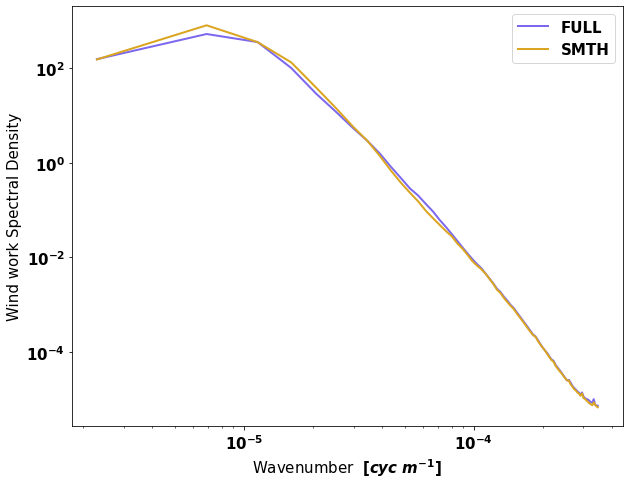

In [45]:
# k3 = np.array([exspec.ki[0],exspec.ki[-1]])
# E3 = 1/k3**3*1e10



plt.figure(figsize=(9,7))


# plt.plot(np.log10(exspec.ki),
#         np.log10(np.nanmean(WWf,axis=0)),label='FULL',linewidth=2,color='mediumslateblue')


# plt.plot(np.log10(exspec.ki),
#         np.log10(np.nanmean(WWt,axis=0)),label='SMTH',linewidth=2,color='goldenrod')

# plt.plot(exspec.ki,np.nanmean(WWf,axis=0),label='FULL',linewidth=2,color='mediumslateblue') #linear
# plt.plot(exspec.ki,np.nanmean(WWt,axis=0),label='SMTH',linewidth=2,color='goldenrod')

plt.loglog(exspec.ki,np.nanmean(WWf,axis=0),label='FULL',linewidth=2,color='mediumslateblue')
plt.loglog(exspec.ki,np.nanmean(WWt,axis=0),label='SMTH',linewidth=2,color='goldenrod')



# plt.yscale('symlog')
# plt.xscale('symlog')

plt.legend()

# plt.grid()
# plt.title('Full Period {0}'.format(varr))
# plt.xlim(-5,-3)
# plt.xticks(np.array([-5,-4]),[r'10$^{-5}$',r'10$^{-4}$'])
# plt.yticks(np.array([-5,-3,-1,1,3,6]),[r'10$^{-5}$',r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$',r'10$^{6}$'])
# plt.xlim(-5,-3.4)
# plt.ylim(-6,3)

#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
plt.ylabel(r'Wind work Spectral Density')

plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/Total_avg_windwork.png')



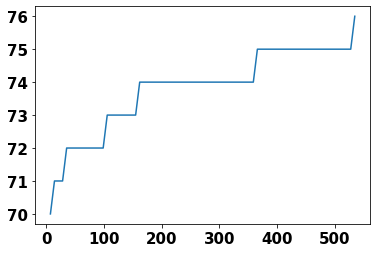

In [80]:
Kf=np.nanmean(WWf,axis=0)
Kt=np.nanmean(WWt,axis=0)
Kk=exspec.ki


values,base=np.histogram(Kf,bins=Kk.shape[0])

cumsum=np.cumsum(values)

plt.plot(base[1:],cumsum)
# plt.yscale('log')



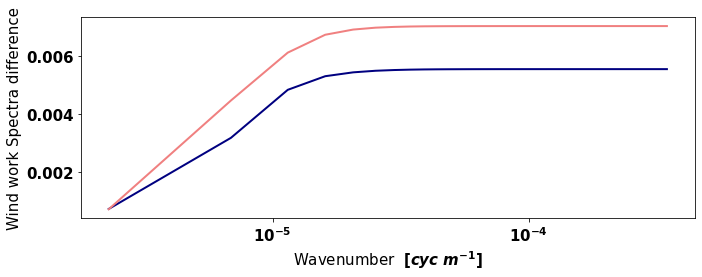

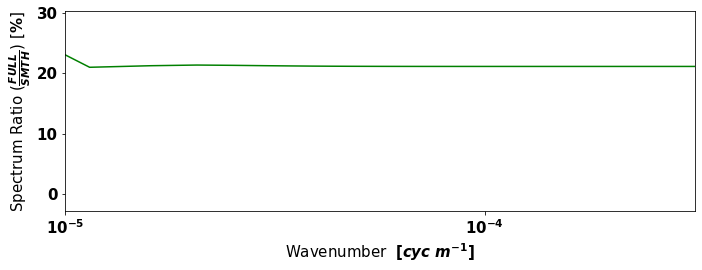

In [57]:
Kf=np.nanmean(WWf,axis=0)
Kt=np.nanmean(WWt,axis=0)
Kk=exspec.ki

plt.figure(figsize=(10,4))
plt.plot(np.log10(Kk),np.cumsum(Kf)*np.diff(Kk)[0],label='FULL',linewidth=2,color='navy')
plt.plot(np.log10(Kk),np.cumsum(Kt)*np.diff(Kk)[0],label='SMTH',linewidth=2,color='lightcoral')
plt.xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
plt.ylabel(r'Wind work Spectra difference')
# plt.xlim(-5,-3.5)
plt.xticks(np.array([-5,-4]),[r'10$^{-5}$',r'10$^{-4}$'])
plt.tight_layout()



plt.figure(figsize=(10,4))
plt.plot(np.log10(Kk),(1-(np.cumsum(Kf)/np.cumsum(Kt)))*100,color='green')
plt.ylabel(r'Spectrum Ratio ($\frac{FULL}{SMTH}$) [$\%$]')
plt.xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
plt.xticks(np.array([-5,-4]),[r'10$^{-5}$',r'10$^{-4}$'])
plt.xlim(-5,-3.5)


plt.tight_layout()

In [12]:
import datetime

t_ind=pd.DatetimeIndex(uf.time_centered.compute())
mon_ind=pd.DatetimeIndex(uf.time_centered.compute()).month
mes=np.array([11,12,1,2,3,4,5,6,7])
mes_str=['Nov/11','Dec/11','Jan/12','Feb/12','Mar/12','Apr/12','May/12','Jun/12','Jul/12']

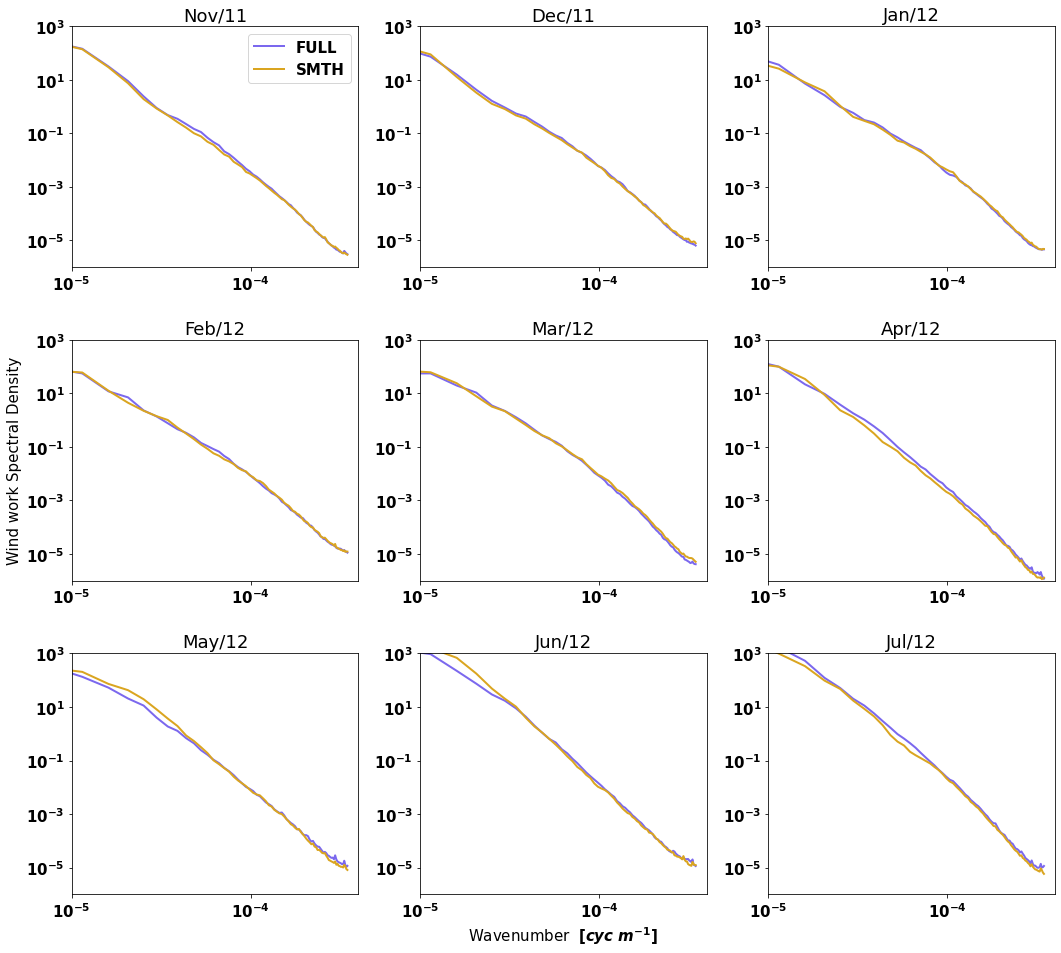

In [28]:
fig, axs = plt.subplots(3,3, figsize=(15, 13.5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.01)

axs = axs.ravel()

for ipp in range(len(mes)):

    axs[ipp].plot(np.log10(exspec.ki),np.log10(np.nanmean(WWf[mon_ind==mes[ipp],:],axis=0)),label='FULL',linewidth=2,color='mediumslateblue')
    axs[ipp].plot(np.log10(exspec.ki),np.log10(np.nanmean(WWt[mon_ind==mes[ipp],:],axis=0)),label='SMTH',linewidth=2,color='goldenrod')
    # axs[ipp].grid()
    axs[ipp].set_title(mes_str[ipp])
    axs[ipp].set_xticks(np.array([-5,-4]))
    axs[ipp].set_xticklabels([r'10$^{-5}$',r'10$^{-4}$'])
    axs[ipp].set_yticks(np.array([-5,-3,-1,1,3,6]))
    axs[ipp].set_xlim(-5,-3.2)
    axs[ipp].set_yticklabels([r'10$^{-5}$',r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$',r'10$^{6}$'])
    axs[3].set_ylabel(r'Wind work Spectral Density')
    axs[7].set_xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
    axs[ipp].set_xlim(-5,-3.4)
    axs[ipp].set_ylim(-6,3)


    axs[0].legend()


plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/monthly_Windwork.png')

